In [1]:
import requests
import pandas as pd

In [2]:
data = pd.read_csv('./data/book_info.csv')

In [6]:
data['DetailLink']

0        https://www.yes24.com/Product/Goods/115142458
1        https://www.yes24.com/Product/Goods/115142458
2        https://www.yes24.com/Product/Goods/115142458
3        https://www.yes24.com/Product/Goods/115142458
4        https://www.yes24.com/Product/Goods/115142458
                             ...                      
41397      https://www.yes24.com/Product/Goods/1433435
41398      https://www.yes24.com/Product/Goods/1433435
41399      https://www.yes24.com/Product/Goods/1433435
41400      https://www.yes24.com/Product/Goods/1433435
41401      https://www.yes24.com/Product/Goods/3203935
Name: DetailLink, Length: 41402, dtype: object

In [7]:
detail_link = pd.DataFrame(data['DetailLink'])

In [10]:
detail_link = detail_link.drop_duplicates()

In [12]:
detail_link_df = pd.DataFrame(detail_link['DetailLink'])

In [13]:
detail_link_df

,DetailLink
0,https://www.yes24.com/Product/Goods/115142458
120,https://www.yes24.com/Product/Goods/97255028
240,https://www.yes24.com/Product/Goods/116962314
360,https://www.yes24.com/Product/Goods/116413800
479,https://www.yes24.com/Product/Goods/116725280
...,...
41333,https://www.yes24.com/Product/Goods/2980092
41337,https://www.yes24.com/Product/Goods/2538233
41347,https://www.yes24.com/Product/Goods/2825128
41360,https://www.yes24.com/Product/Goods/2297360


In [62]:
detail_link.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458 entries, 0 to 41401
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DetailLink  1458 non-null   object
dtypes: object(1)
memory usage: 22.8+ KB


In [15]:
import requests
url = 'https://www.yes24.com/Product/Goods/115142458'
r = requests.get(url)
print(r.status_code)


200


In [16]:
from bs4 import BeautifulSoup as bs
soup = bs(r.text, 'lxml')

<!DOCTYPE html>
<html lang="ko">
<head><link href="https://m.yes24.com/Goods/Detail/115142458" rel="canonical"/>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<meta content="dpr, width, viewport-width, rtt, downlink, ect, UA, UA-Platform, UA-Arch, UA-Model, UA-Mobile, UA-Full-Version" http-equiv="Accept-CH"/>
<meta content="86400" http-equiv="Accept-CH-Lifetime"/>
<meta content="unsafe-url" name="referrer"/>
<meta content="width=1170" name="viewport"/>
<title>만일 내가 인생을 다시 산다면 - 예스24 </title>
<meta content="만일 내가 인생을 다시 산다면" name="title"/>
<meta content="김혜남 저" name="author"/>
<meta content="벌써 마흔이 된 당신에게 해 주고 싶은 말들 42. 김혜남 저. 메이븐. 판매가 15,480원(10% 할인). 포인트 860원(5% 적립). “하나의 문이 닫히면 또 하나의 문이 열린다. 그러니 더 이상 고민하지 말고 그냥 재미있게 살아라!”30년 동안 정신분..." name="description"/>
<meta content="인생후반전,마흔즈음에,2023대구올해의책,크레마클럽에있어요,인생선배,인생2막대비,내인생이달라졌다,인생은끝까지모르는거야,인생교훈,벌써 마흔이 된 당신에게 해 주고 싶은 말들 42, 김혜남 저, 메이븐,1190538512,9791190538510" na
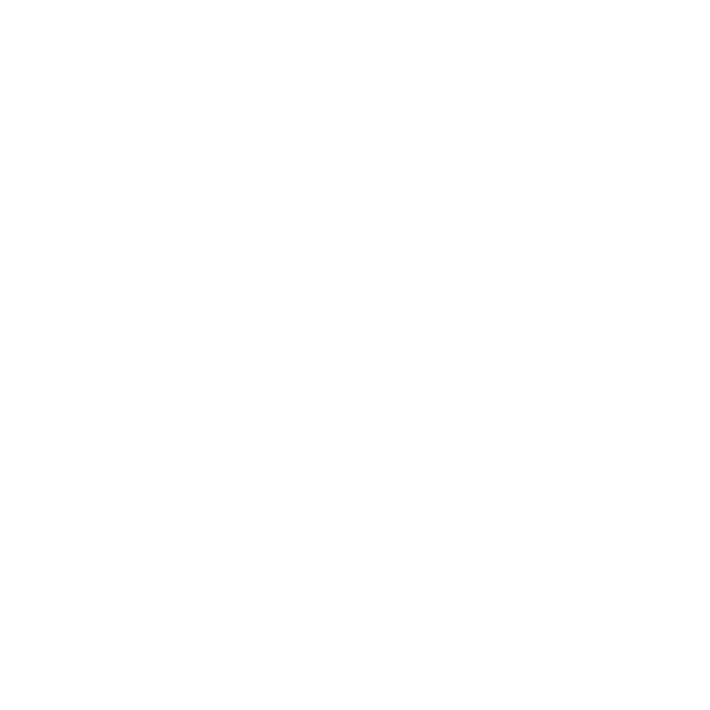
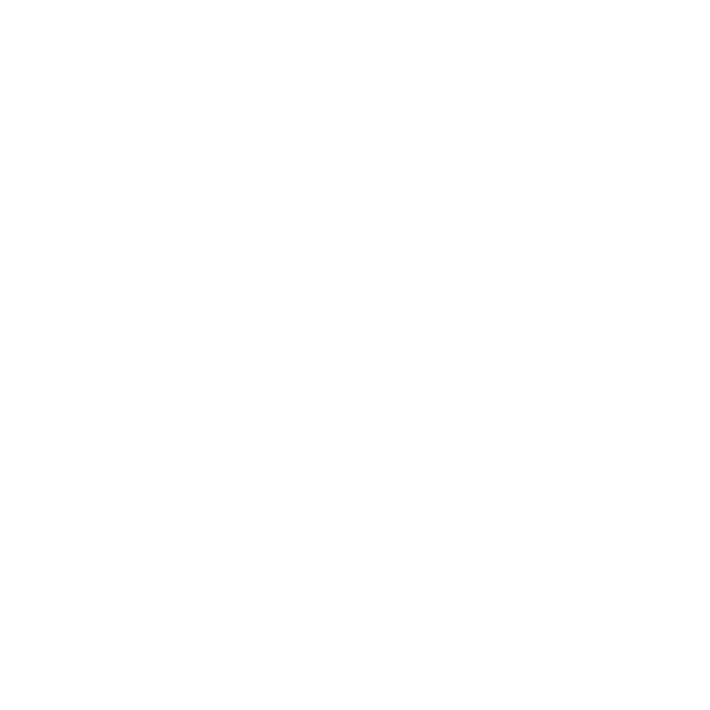
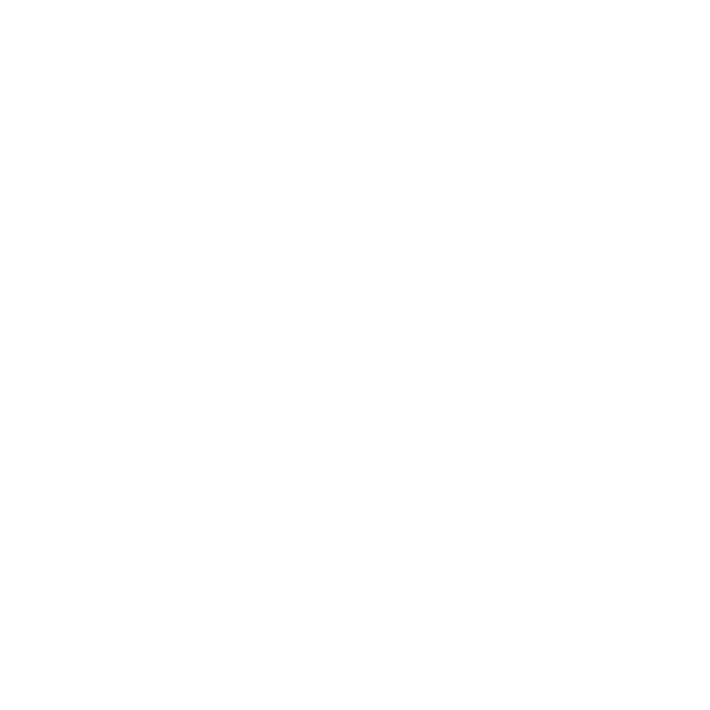
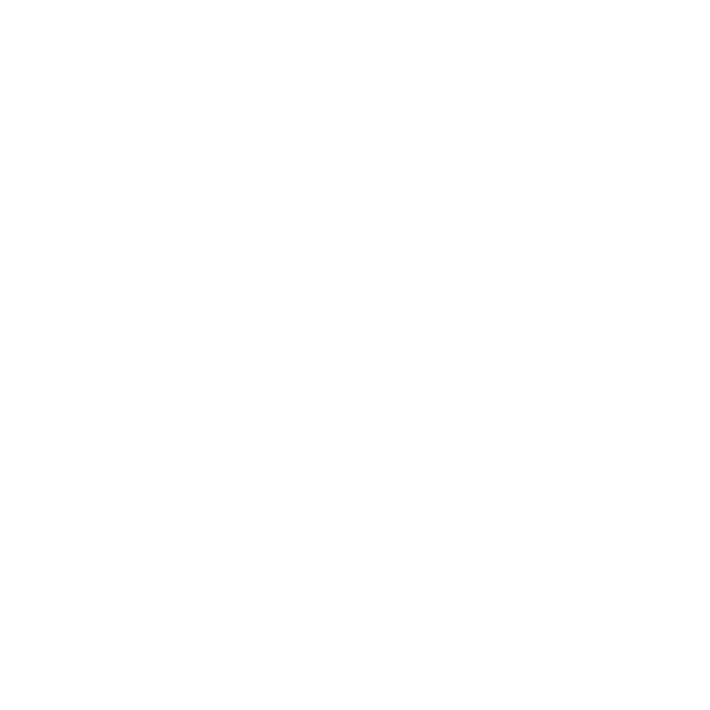
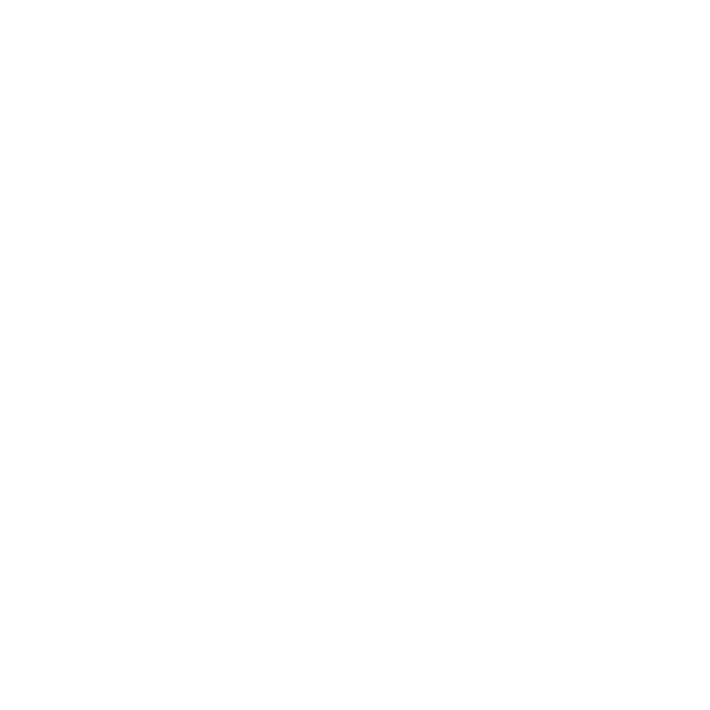
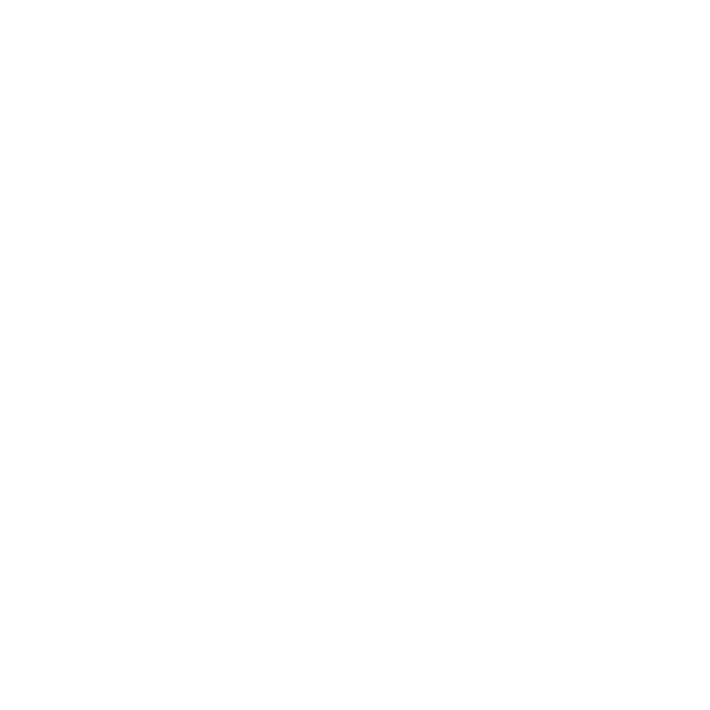
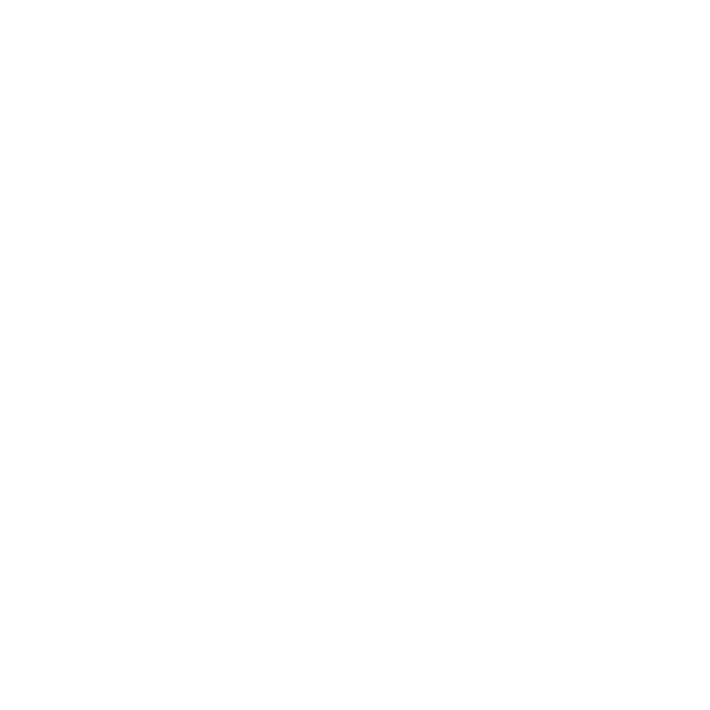
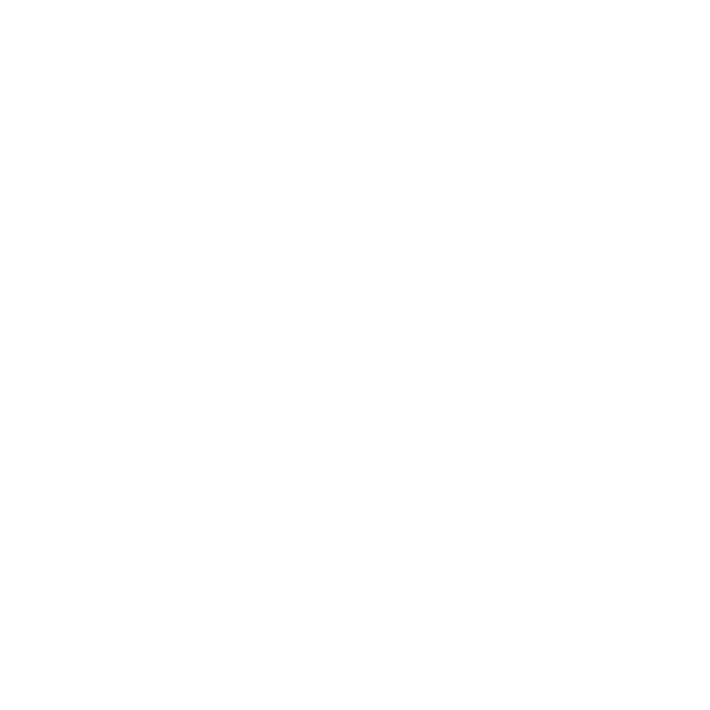
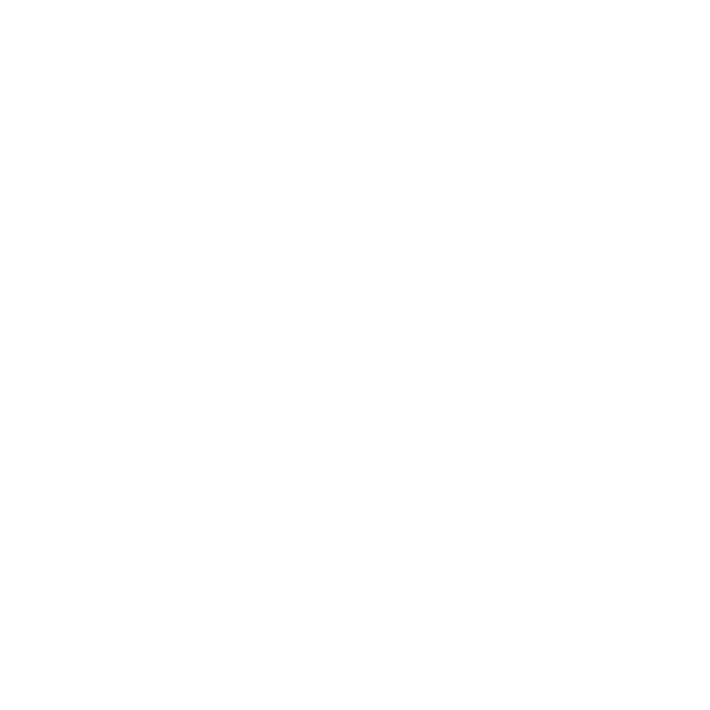
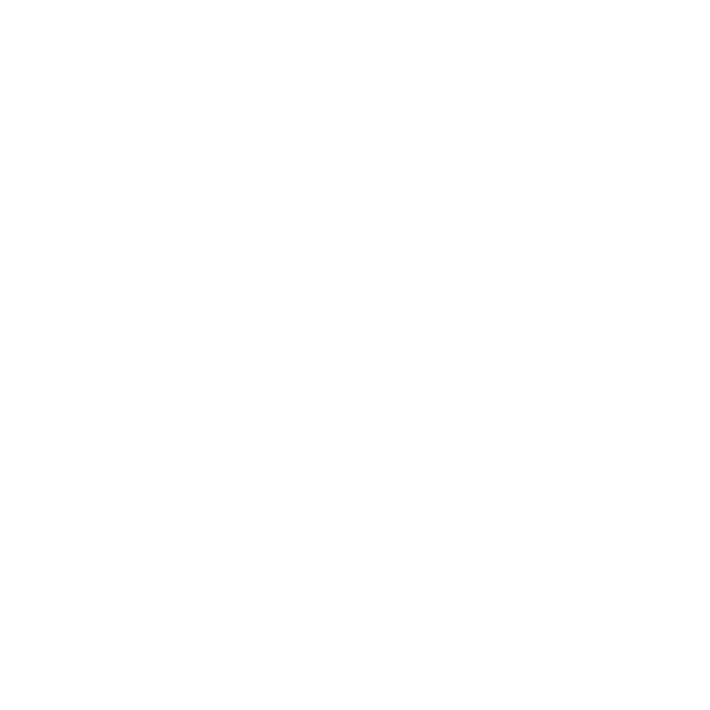
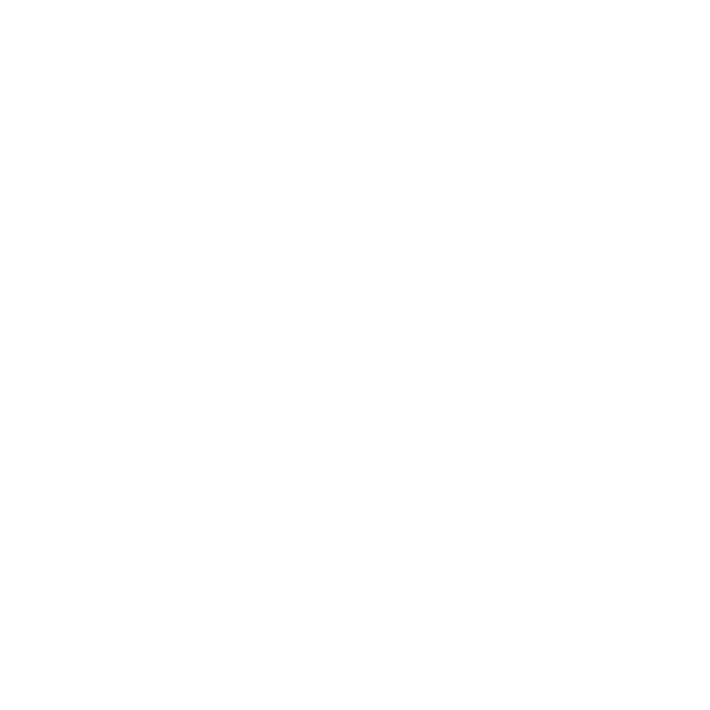
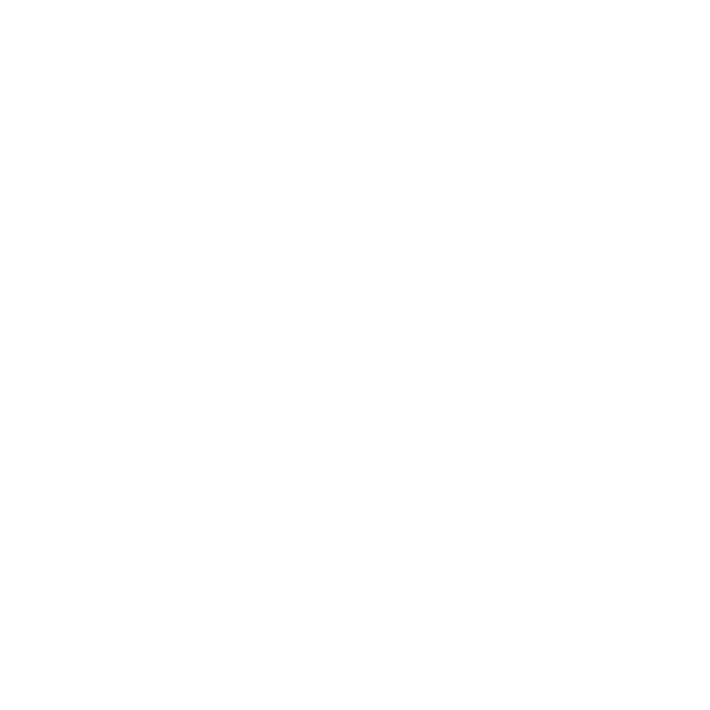
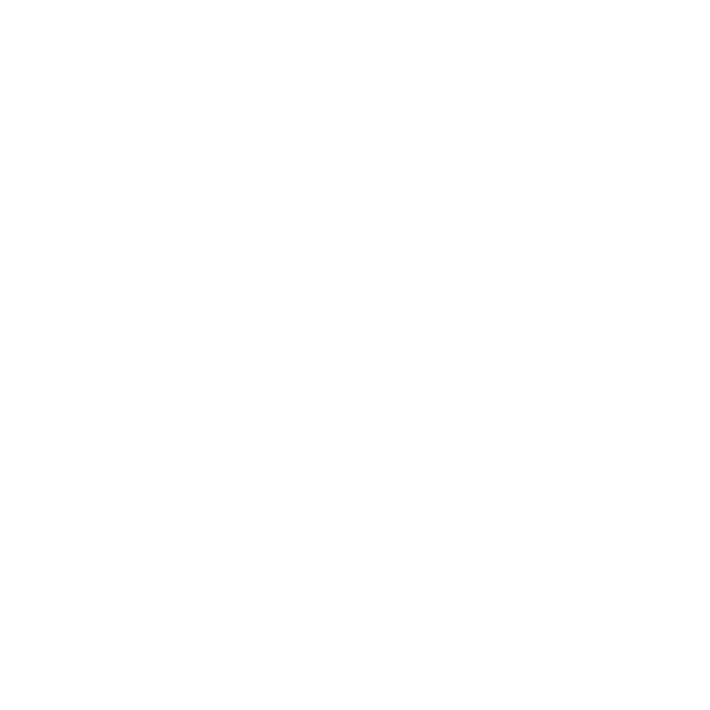
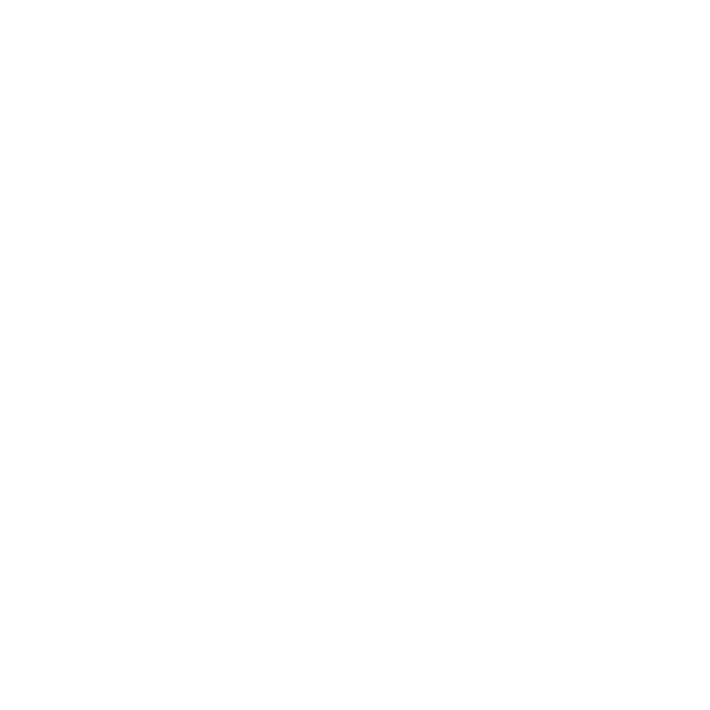
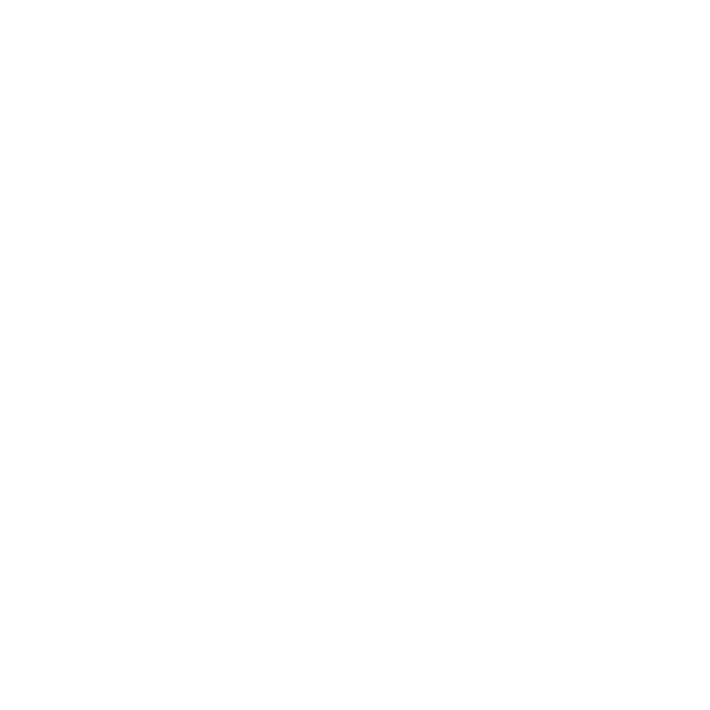
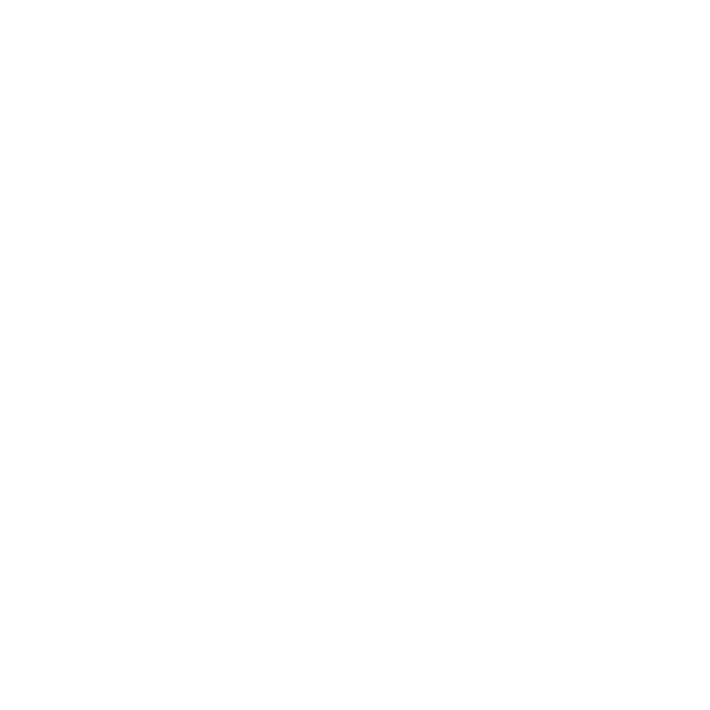
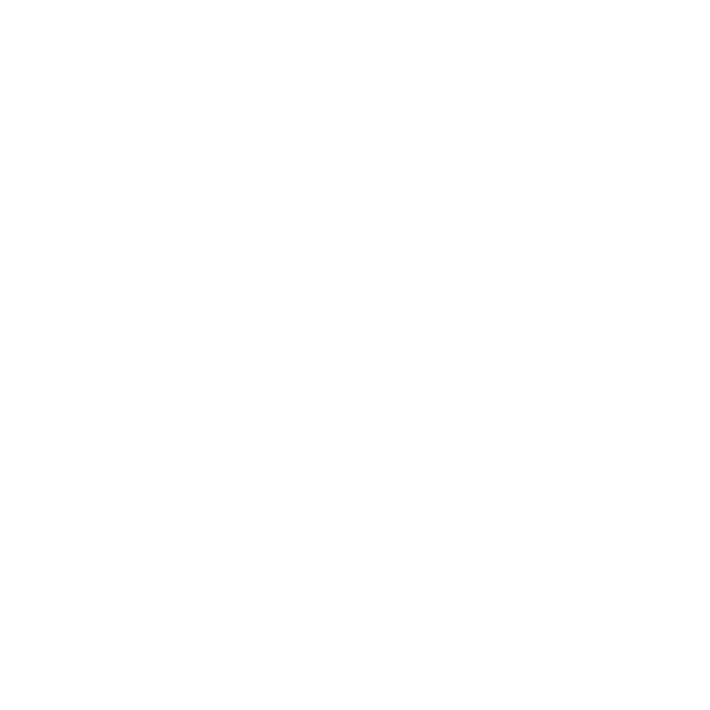
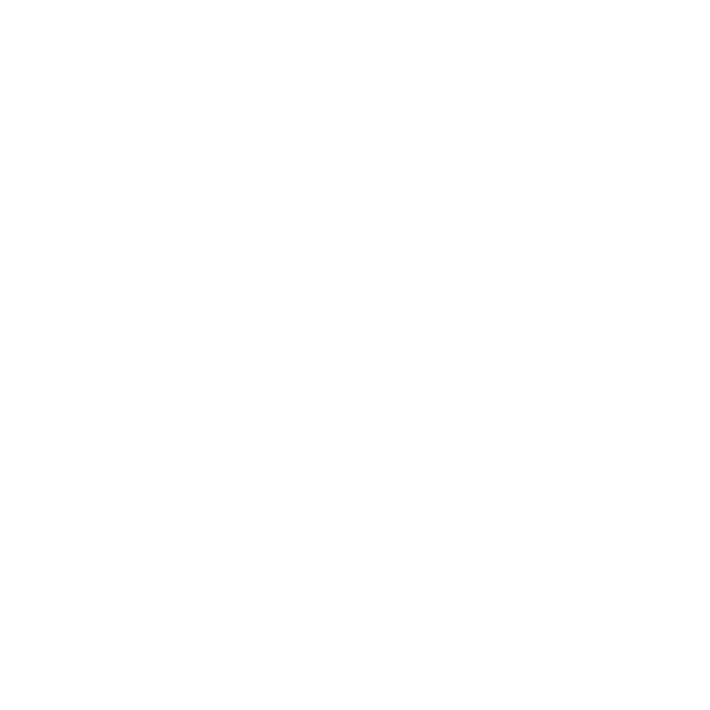
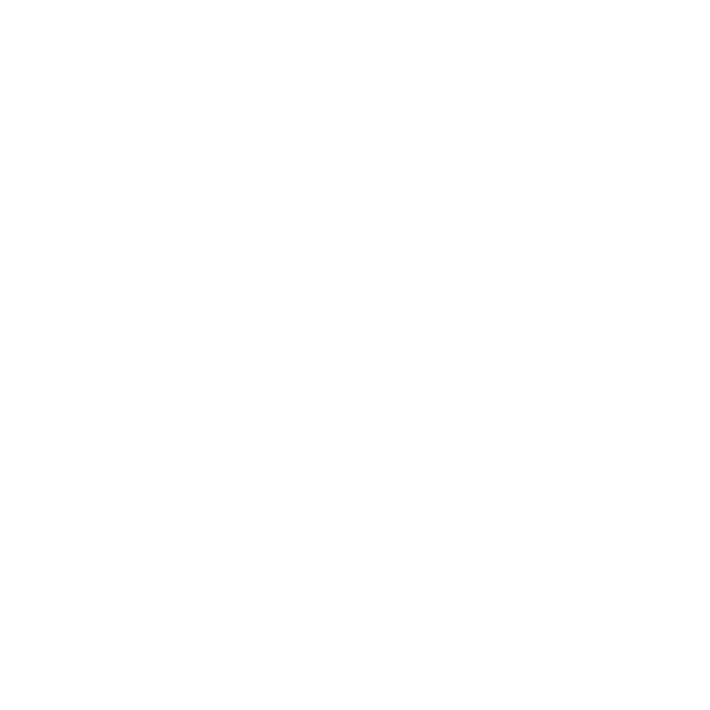
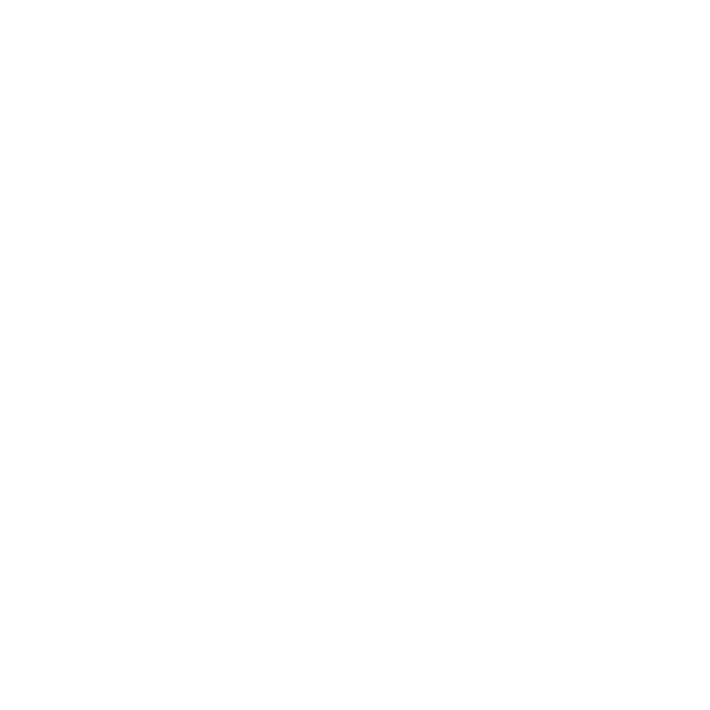

In [16]:
soup

In [17]:
soup.select_one('.gd_name').text

'만일 내가 인생을 다시 산다면'

In [39]:
soup.select_one('#infoset_goodsCate').find('ul',{"class":'yesAlertLi'})

<ul class="yesAlertLi">
<li> <em class="bl_dot bgYUI"> </em>
<a href="https://www.yes24.com/Main/Book.aspx?CategoryNumber=001">국내도서</a>
<em class="divi_cate bgYUI">&gt;</em>
<a href="/24/Category/Display/001001019">인문</a>
<em class="divi_cate bgYUI">&gt;</em>
<a href="/24/Category/Display/001001019019">주제로 읽는 인문학 </a>
<em class="divi_cate bgYUI">&gt;</em>
<a href="/24/Category/Display/001001019019002">노년 / 죽음</a>
</li>
</ul>

In [29]:
soup.select_one('#infoset_goodsCate').find('ul',{"class":'yesAlertLi'}).text.split('\n')

['', ' \xa0', '국내도서', '>', '인문', '>', '주제로 읽는 인문학 ', '>', '노년 / 죽음', '', '']

In [37]:
soup.select_one('#infoset_goodsCate').find('ul',{"class":'yesAlertLi'}).text.replace("\n", ' ').strip().split('>')

['국내도서 ', ' 인문 ', ' 주제로 읽는 인문학  ', ' 노년 / 죽음']

In [38]:
categories = soup.select_one('#infoset_goodsCate').find('ul',{"class":'yesAlertLi'}).text.replace("\n", ' ').strip().split('>')

In [43]:
soup.select_one('.gd_infoTb')

<div class="gd_infoTb">
<table summary="상품 가격정보 테이블">
<colgroup>
<col width="110"/>
<col width="*"/>
</colgroup>
<caption>상품 가격정보</caption>
<tbody>
<!-- 개발 코맨트 : 음반/DVD/GIFT 는 "정가/판매가" 가 아니라 "판매가/할인가" 임 -->
<tr>
<th scope="row">
                        정가
                    </th>
<td>
<span class=""><em class="yes_m">17,200원</em></span>
</td>
</tr>
<tr class="accentRow">
<th scope="row">판매가</th>
<td>
<span class="nor_price"><em class="yes_m">15,480</em>원</span>  (10% 할인)
                                    </td>
</tr>
<!-- 가격표시쿠폰 시작 -->
<!-- 가격표시쿠폰 끝 -->
<tr class="accentRow">
<th scope="row">
                        크레마머니<br/>최대혜택가
                        <a class="bgYUI ico_comm ico_help" href="javascript:void(0)" onclick="openlayerNew('dPop_cremaPrice',this,true, 380);" title="도움말"></a>
</th>
<td>
<span class="nor_price crema_price"><em class="yes_m">13,980</em>원</span>
</td>
</tr>
<tr>
<th scope="row">
                    YES포인트 <a class="bgYUI ico_comm ico_help" href="javascript:

In [45]:
price = soup.select_one('.gd_infoTb').find('em',{"class":'yes_m'}).text

'17,200원'

# 추가 정보

In [17]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time

In [34]:
detail_info = []
for idx, link in enumerate(detail_link_df['DetailLink'][1274:]):
    driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
    driver.set_window_size(1920, 1080)
    try:
        print(f"{idx}번째 link 수집중")
        driver.get(link)
        time.sleep(3)
        soup = bs(driver.page_source, 'lxml')
        title = soup.select_one('.gd_name').text
        categories = soup.select_one('#infoset_goodsCate').find('ul',{"class":'yesAlertLi'}).text.replace("\n", ' ').strip().split('>')
        price = soup.select_one('.gd_infoTb').find('em',{"class":'yes_m'}).text
        detail_info.append({"Title":title, "Category":categories, "Price":price})
        print("append중")
    except Exception as e:
        print("없음",e)
        pass
    finally:
        driver.quit()
        

0번째 link 수집중
append중
1번째 link 수집중
append중
2번째 link 수집중
append중
3번째 link 수집중
append중
4번째 link 수집중
append중
5번째 link 수집중
append중
6번째 link 수집중
append중
7번째 link 수집중
append중
8번째 link 수집중
append중
9번째 link 수집중
append중
10번째 link 수집중
append중
11번째 link 수집중
append중
12번째 link 수집중
append중
13번째 link 수집중
append중
14번째 link 수집중
append중
15번째 link 수집중
append중
16번째 link 수집중
append중
17번째 link 수집중
append중
18번째 link 수집중
append중
19번째 link 수집중
append중
20번째 link 수집중
append중
21번째 link 수집중
append중
22번째 link 수집중
append중
23번째 link 수집중
append중
24번째 link 수집중
append중
25번째 link 수집중
append중
26번째 link 수집중
append중
27번째 link 수집중
append중
28번째 link 수집중
append중
29번째 link 수집중
append중
30번째 link 수집중
append중
31번째 link 수집중
append중
32번째 link 수집중
append중
33번째 link 수집중
append중
34번째 link 수집중
append중
35번째 link 수집중
append중
36번째 link 수집중
append중
37번째 link 수집중
append중
38번째 link 수집중
append중
39번째 link 수집중
append중
40번째 link 수집중
append중
41번째 link 수집중
append중
42번째 link 수집중
append중
43번째 link 수집중
append중
44번째 link 수집중
append중
45번째 link 수집중
append

In [35]:
pd.DataFrame(detail_info)

,Title,Category,Price
0,김남주의 집,"[국내도서 , 가정 살림 , 육아 , 육아법/육아일기 국내도서 , 가...","15,000원"
1,기도 내려놓기,"[국내도서 , 종교 , 불교 , 불교 명상/수행]","8,500원"
2,엑셀 2007 바이블,"[국내도서 , IT 모바일 , 오피스 활용 , MS Excel(엑셀)]","28,000원"
3,소지섭의 길,"[국내도서 , 에세이 , 여행 에세이 국내도서 , 에세이 , 포토 에...","19,800원"
4,전략 사전,"[국내도서 , 경제 경영 , 경영 , 경영전략/경영혁신 국내도서 , ...","28,000원"
...,...,...,...
177,THE BOX 더 박스,"[국내도서 , 경제 경영 , 경제 , 경제상식/경제이야기]","25,000원"
178,아틀라스 세계는 지금,"[국내도서 , 역사 , 역사와 문화 교양서 국내도서 , 사회 정치 , ...","19,800원"
179,피라미드에서 살아남기 2,"[국내도서 , 어린이 , 3-4학년 , 3-4학년 만화/애니메이션 , 3-4...","9,000원"
180,손뜨개 DIY 목도리 & 모자,"[국내도서 , 건강 취미 , 패션/수공예 국내도서 , 건강 취미 , ...","8,000원"


In [36]:
detail_info_df = pd.DataFrame(detail_info)

In [37]:
detail_info_df.to_csv('./data/detail_info_df1341Toend.csv',index=False)